Problem 3:

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

data = pd.read_csv('hw1-data/X_train.csv',header=None)
y1 = pd.read_csv('hw1-data/y_train.csv',header=None)
test_data = pd.read_csv('hw1-data/X_test.csv',header=None)
test_x = test_data.iloc[:,0:7]
data_x = data.iloc[:,0:7]
y_test = pd.read_csv('hw1-data/y_test.csv',header=None)
y_test = y_test.iloc[:,0].tolist()

In [67]:
def power(d,po):
    m = pd.DataFrame()
    for i in range(0,6):
        m[i] = d[i]**po
    return m

def standardize(d):
    m = pd.DataFrame()
    for i in range(0,6):
        m[i] = (d[i]-d[i].mean())/d[i].std()
    return m

def computew(x,lam):
    u, s, vt = np.linalg.svd(x,full_matrices=False)
    y = np.array(y1.loc[:,0])
    matrix = []
    element = []
    w = []
    df = []
    sum = 0
    for i in range(0,lam):
        for m in range(0,x.shape[1]):
            element.append(s[m]/(i + (s[m]*s[m])))
            sum = sum + ((s[m]*s[m])/(i + (s[m]*s[m])))
        each_matrix = np.diag(element)
        element = []
        df.append(sum)
        sum = 0
        matrix.append(each_matrix)
        vs_inv = np.matmul(vt.transpose(),matrix[i])
        vsinvut = np.matmul(vs_inv,u.transpose())
        w.append(np.matmul(vsinvut,y))

    w = np.array(w)
    df = np.array(df)
    return w,df

def rmse(test,w,l):
    pred = []
    for lam in range(0,l):
        y_pred = np.matmul(test,w[:,lam])
        pred.append(y_pred)
    rmse = []
    lam = []
    sum = 0
    for x in range(0,l):
        for i in range(0,42):
            sum = sum + ((pred[x][i]-y_test[i])*(pred[x][i]-y_test[i]))
        rmse.append(math.sqrt(sum/42))
        sum = 0
        lam.append(x)
    return lam,rmse



Question 3a:

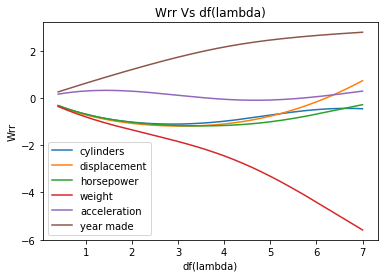

In [68]:
w, df = computew(data_x,5000)
plt.plot(df,w[:,0].transpose(),label='cylinders')
plt.plot(df,w[:,1].transpose(),label='displacement')
plt.plot(df,w[:,2].transpose(),label='horsepower')
plt.plot(df,w[:,3].transpose(),label='weight')
plt.plot(df,w[:,4].transpose(),label='acceleration')
plt.plot(df,w[:,5].transpose(),label='year made')
plt.legend()
plt.xlabel("df(lambda)")
plt.ylabel("Wrr")
plt.title("Wrr Vs df(lambda)")
plt.show()


Question 3b:

Year made and weight are the dimensions that stand out over others. It can be seen that ridge regression penalises these two variables severely and hence it can be inferred that these are the ones that possess high coefficients in the ridge regression equation. In other words, these features affect the target variable the most.

Question 3c:

From the figure below, lower lambda values give lower RMSE. A lambda value equal to 0 gives the lowest RMSE, which means it is least squares solution. Looking at this graph, least squares solution would be a natural choice.

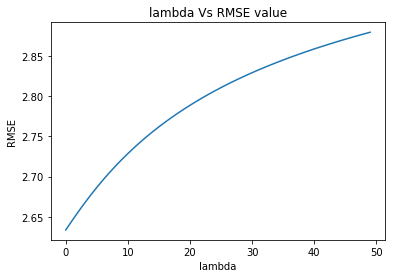

In [69]:
lamda,rmse_val = rmse(test_x,computew(data_x,50)[0].transpose(),50)
plt.plot(lamda,rmse_val)
plt.xlabel("lambda")
plt.ylabel("RMSE")
plt.title("lambda Vs RMSE value")
plt.show()

Question 3d (with standardization):

Following is the code with standardization of both train and test data. The results show that introducing higher order polynomials do not improve RMSE value and hence OLS still holds an ideal choice. 

         0        1        2        3        4        5  6         0        1  \
0  0.30957 -0.36707  0.45545 -0.20083 -0.73992 -0.80885  1 -1.160847 -0.79933   

          2         3         4         5         0         1         2  \
0 -0.484025 -0.881534 -0.270242 -0.344645 -0.261008 -0.255732 -0.194043   

          3         4         5  
0 -0.200811 -0.206978 -0.313808  
         0        1        2        3        4        5  6         0        1  \
0  0.30957 -0.36707  0.45545 -0.20083 -0.73992 -0.80885  1 -1.160847 -0.79933   

          2         3         4         5         0         1         2  \
0 -0.484025 -0.881534 -0.270242 -0.344645  0.029667  0.042743  0.000003   

          3         4         5  
0  0.146147  0.119444  0.021254  


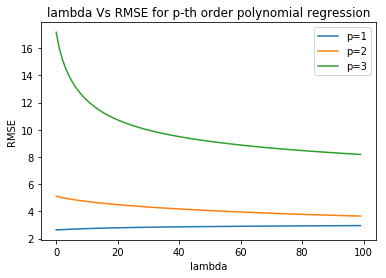

In [137]:
def power1(d,p):
    m = pd.DataFrame()
    for c in range(0,6):
        m[c] = d[c]**p
    return m

def std_data(d):
    for c in d:
        d[c] = (d[c]-d[c].mean())/d[c].std()
    return d

def std_test(d,p):
    m = pd.DataFrame()
    for c in range(0,6):
        m[c] = (d[c]-p[c].mean())/p[c].std()
    return m
 

data2 = power1(data_x.loc[:,'0':'5'],2)
data3 = power1(data_x.loc[:,'0':'5'],3)

data_sx_2 = std_data(data2)
data_sx_3 = std_data(data3)


data_x_2 = pd.concat([data_x,data_sx_2],axis=1)
data_x_3 = pd.concat([data_x_2,data_sx_3],axis=1)

test2 = power1(test_x.loc[:,'0':'5'],2)
test3 = power1(test_x.loc[:,'0':'5'],3)

test_sx_2 = std_test(test2,data2)
test_sx_3 = std_test(test3,data3)

test_x_2 = pd.concat([test_x,test_sx_2],axis=1)
test_x_3 = pd.concat([data_x_2,test_sx_3],axis=1)

print(data_x_3.head(n=1))
print(test_x_3.head(n=1))
w1 = computew(data_x,100)[0]
w2 = computew(data_x_2,100)[0]
w3 = computew(data_x_3,100)[0]

lam1, rmse1 = rmse(test_x,w1.transpose(),100)
lam2, rmse2 = rmse(test_x_2,w2.transpose(),100)
lam3, rmse3 = rmse(test_x_3,w3.transpose(),100)

plt.plot(lam1,rmse1,label="p=1")
plt.plot(lam2,rmse2,label="p=2")
plt.plot(lam3,rmse3,label="p=3")
plt.xlabel("lambda")
plt.ylabel("RMSE")
plt.legend()
plt.title("lambda Vs RMSE for p-th order polynomial regression")
plt.show()

Question 3d (without standardization):

From the figure below, it is clearly seen that on introducing 2rd order polynomial regression, it is seen that RMSE drops to minimum value at lambda=23. Hence, 2rd order polynomial ridge regression with lambda value 23 is an ideal choice. I presented both observations (with and without standardization) because the decision entirely changes with both cases.

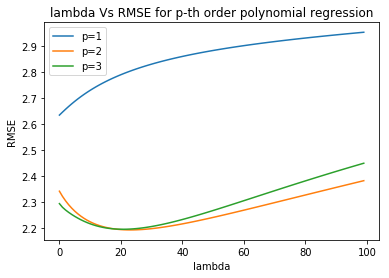

In [136]:
data_x_2 = pd.concat([data_x,power(data_x,2)], axis=1, sort=False)
data_x_3 = pd.concat([data_x_2,power(data_x,3)], axis=1, sort=False)
test_2 = pd.concat([test_x,power(test_x,2)], axis=1, sort=False)
test_3 = pd.concat([test_2,power(test_x,3)], axis=1, sort=False)

w1 = computew(data_x,100)[0]
w2 = computew(data_x_2,100)[0]
w3 = computew(data_x_3,100)[0]

lam1, rmse1 = rmse(test_x,w1.transpose(),100)
lam2, rmse2 = rmse(test_2,w2.transpose(),100)
lam3, rmse3 = rmse(test_3,w3.transpose(),100)

plt.plot(lam1,rmse1,label="p=1")
plt.plot(lam2,rmse2,label="p=2")
plt.plot(lam3,rmse3,label="p=3")
plt.xlabel("lambda")
plt.ylabel("RMSE")
plt.legend()
plt.title("lambda Vs RMSE for p-th order polynomial regression")
plt.show()